In [26]:
library(dplyr)
library(DataExplorer)

In [27]:
data <- read.csv(file="data/adult.data", stringsAsFactors = TRUE, col.names=c("age", "workclass", "fnlwgt", "education", 
                                                       "education.num","marital.status", "occupation", "relationship", "race","sex",
                                                       "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [28]:
(data %>% sample_n(5))

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
30,Private,175856,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,38,United-States,<=50K
39,Private,181943,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,35,United-States,<=50K
26,Private,224361,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
28,Private,66434,10th,6,Never-married,Other-service,Unmarried,White,Female,0,0,15,United-States,<=50K
61,Private,168654,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,Canada,<=50K


In [29]:
(colnames(data))

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"

In [31]:
trim_factor_columns <- function(x) {
  if (is.factor(x)) {
    x <- as.factor(trimws(as.character(x)))
  }
  return(x)
}

adult_data <- data %>%
  mutate_if(is.factor, trim_factor_columns)

In [32]:
columns_names_with_question <- names(adult_data)[sapply(adult_data, function(col) any(trimws(col) == "?"))]
for (col_name in columns_names_with_question) {
  adult_data[[col_name]][trimws(adult_data[[col_name]]) == "?"] <- NA
}                                                    

In [33]:
(columns_with_na <- colSums(is.na(adult_data)) > 0)

age      workclass         fnlwgt      education  education.num 
         FALSE           TRUE          FALSE          FALSE          FALSE 
marital.status     occupation   relationship           race            sex 
         FALSE           TRUE          FALSE          FALSE          FALSE 
  capital.gain   capital.loss hours.per.week native.country         income 
         FALSE          FALSE          FALSE           TRUE          FALSE

In [34]:
names(adult_data)[sapply(adult_data, function(col) any(col == " ?"))]

[1] NA NA NA

In [35]:
# Missing observations?
sum(is.na(adult_data))

[1] 4262

In [36]:
#education.num = education
adult_data <- subset(adult_data, select = -education.num)

In [37]:
adult_data$income_binary <- as.numeric(adult_data$income) - 1

In [38]:
adult_data

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


# Classification

## Linear regression

### Age & Education

In [39]:
model.1 <- lm(income_binary ~ age + education, data=adult_data)

In [40]:
pred_1 <- predict(model.1, adult_data)

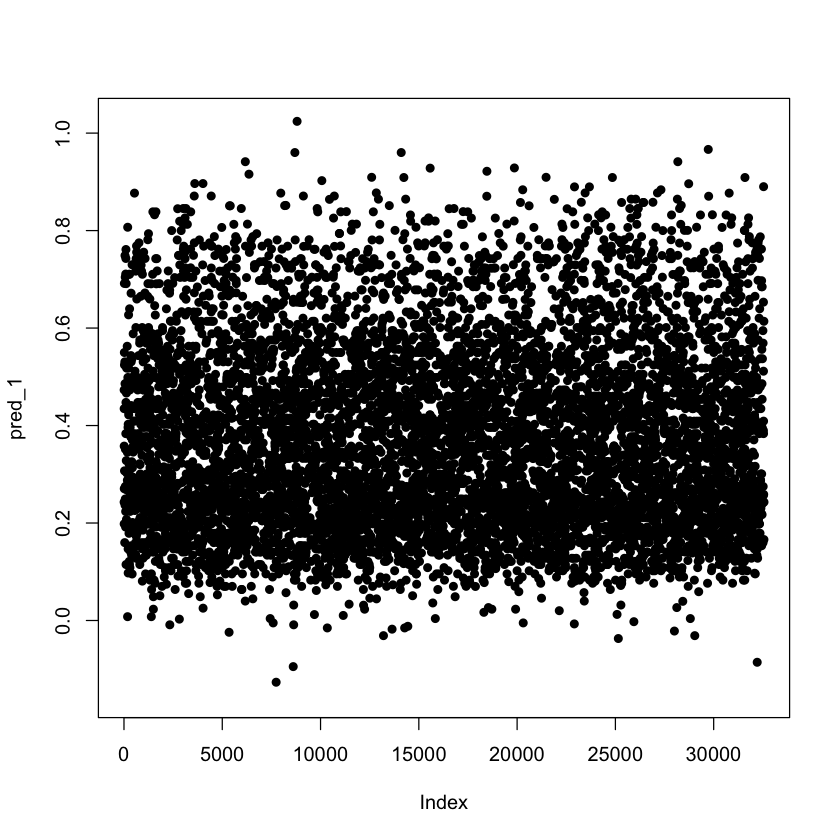

In [41]:
plot(pred_1, col=adult_data$income_binary, pch=16)

In [42]:
(confusion.matrix1 <- table(round(pred_1), adult_data$income_binary))

   
        0     1
  0 23588  5923
  1  1131  1918

In [43]:
(accuracy1 <- sum(diag(confusion.matrix1))/sum(confusion.matrix1))

[1] 0.7833538

### Sex

In [44]:
model.2 <- lm(income_binary ~ sex, data=adult_data)

In [45]:
pred_2 <- predict(model.2, adult_data)

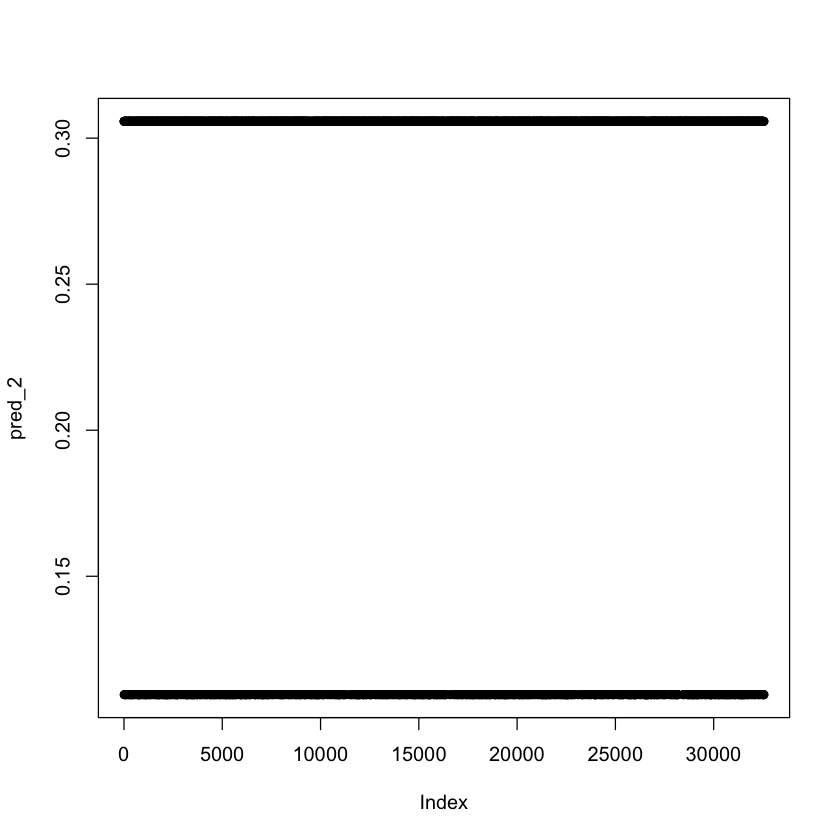

In [46]:
plot(pred_2, col=adult_data$income_binary, pch=16)

In [47]:
(confusion.matrix2 <- table(round(pred_2), adult_data$income_binary))

   
        0     1
  0 24719  7841

In [49]:
(accuracy2 <- sum(diag(confusion.matrix2))/sum(confusion.matrix2))

[1] 0.759183

### Age, Education, Marital status, Relationship, Race, Sex

In [54]:
model.3 <- lm(income_binary ~ age + education + marital.status + relationship + race + sex, data=adult_data)

In [55]:
pred_3 <- predict(model.3, adult_data)

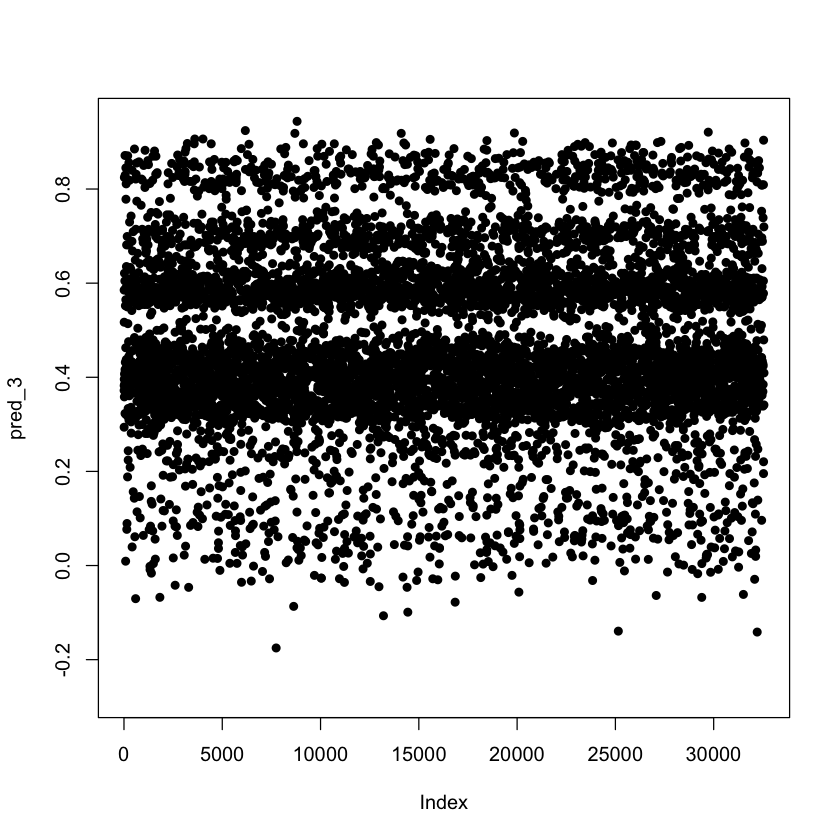

In [56]:
plot(pred_3, col=adult_data$income_binary, pch=16)

In [57]:
(confusion.matrix3 <- table(round(pred_3), adult_data$income_binary))

   
        0     1
  0 23409  4519
  1  1310  3322

In [58]:
(accuracy3 <- sum(diag(confusion.matrix3))/sum(confusion.matrix3))

[1] 0.8209767